In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=2)

In [14]:
np.count_nonzero(y==0)
# y.shape

334

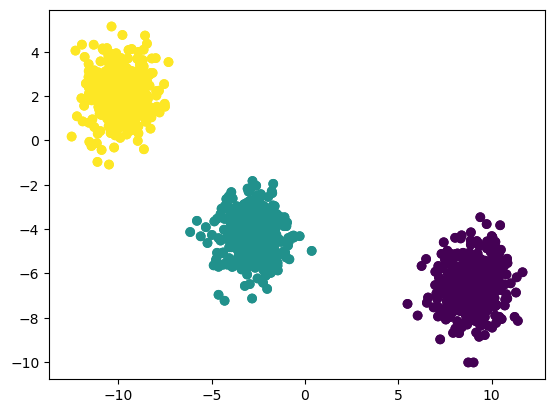

In [16]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)


In [ ]:
from sklearn.cluster import KMeans

wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

In [19]:
wcss

[1340.0000000000005,
 357.8563666559419,
 61.194346544926894,
 50.19450001306529,
 39.57859478686448,
 37.298416510751736,
 25.89419623966699,
 23.66645698055177,
 20.48239299860836,
 19.531622668496734]

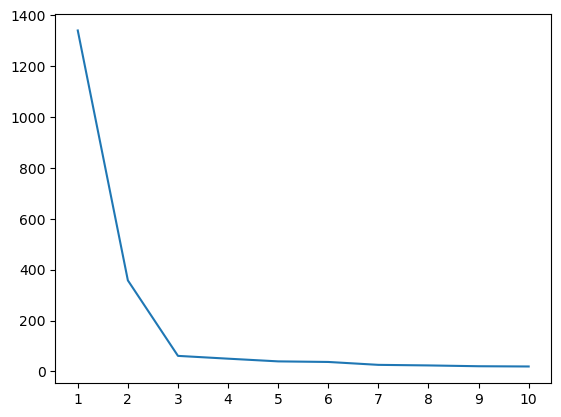

In [21]:
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))

plt.show()

In [22]:
kmeans=KMeans(n_clusters=3,init="k-means++")
kmeans.fit_predict(X_train_scaled)

c:\Users\ankit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


array([2, 2, 2, 1, 1, 1, 2, 0, 0, 0, 0, 2, 2, 1, 0, 0, 1, 2, 0, 2, 2, 2,
       2, 2, 1, 2, 1, 0, 1, 1, 1, 2, 0, 2, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0,
       0, 2, 1, 2, 0, 1, 2, 1, 1, 0, 1, 0, 2, 1, 2, 1, 0, 1, 1, 0, 0, 1,
       2, 2, 1, 0, 1, 1, 1, 2, 0, 2, 2, 1, 1, 1, 1, 0, 1, 2, 2, 2, 1, 1,
       2, 2, 2, 0, 0, 1, 1, 2, 1, 0, 2, 2, 2, 0, 1, 0, 2, 1, 2, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 2, 0, 1, 1, 2, 0, 0, 2, 2, 1, 2, 2, 2, 2, 0, 1,
       2, 2, 0, 1, 2, 0, 0, 0, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1,
       0, 1, 2, 2, 1, 0, 0, 0, 2, 1, 2, 1, 0, 2, 2, 1, 2, 0, 2, 1, 0, 1,
       0, 1, 2, 1, 1, 1, 1, 2, 1, 1, 0, 1, 2, 2, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 2, 0, 1, 0, 2, 2, 2, 1, 1, 2, 1, 2, 1, 2, 0, 0, 1,
       2, 1, 2, 2, 2, 1, 2, 2, 0, 2, 1, 0, 0, 0, 2, 2, 2, 1, 2, 2, 2, 0,
       0, 2, 1, 1, 0, 1, 2, 0, 0, 2, 0, 2, 2, 2, 0, 1, 2, 1, 1, 1, 2, 1,
       2, 1, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 2, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 1,

In [23]:
y_pred=kmeans.predict(X_test_scaled)

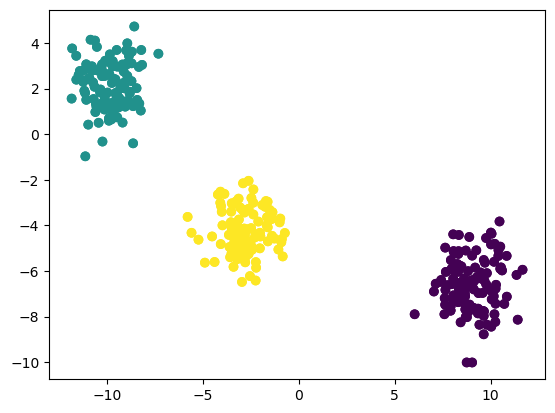

In [25]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)
plt.show()

## Validating K Value
kneelocator

Silhoutee scoring


In [28]:
# Kneelocator
!pip install kneed

In [34]:
from kneed import KneeLocator
kl=KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")
kl.elbow

3

In [37]:
# Silhoutte score
from sklearn.metrics import silhouette_score

silhouette_coeff=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    # kmeans.labels_ means how many clusters are predicted by model
    score=silhouette_score(X_train_scaled,kmeans.labels_)
    silhouette_coeff.append(score)

c:\Users\ankit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\ankit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\ankit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\ankit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

In [40]:
silhouette_coeff

[0.6696721110569295,
 0.7827443210388431,
 0.6541047975698088,
 0.5504560157319957,
 0.5149412011328991,
 0.4090822574809298,
 0.38617580987167166,
 0.3672459439709934,
 0.33272217681902394]

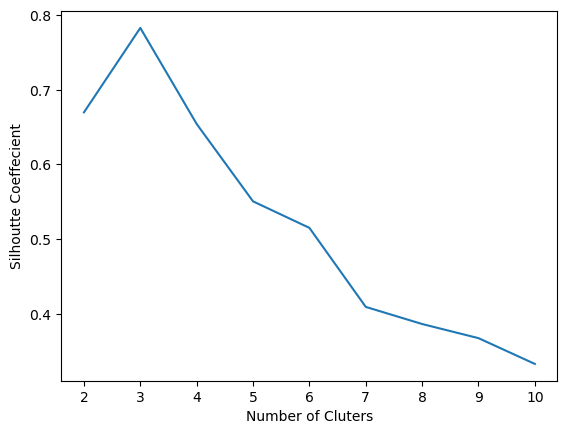

In [39]:
plt.plot(range(2,11),silhouette_coeff)
plt.xticks(range(2,11))
plt.xlabel("Number of Cluters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()